In [38]:
import requests
import pandas as pd
import re
import numpy as np
import os

from bs4 import BeautifulSoup

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_colwidth', 10000)


In [39]:
df = pd.read_csv('data/bios-art-complete.csv')

In [40]:
df.shape

(3278, 30)

In [41]:
age_dict = dict(df.groupby('age_exposure_cleaned').size())
age_dict

{0.0: 3,
 1.0: 9,
 2.0: 9,
 3.0: 14,
 4.0: 16,
 5.0: 21,
 6.0: 29,
 7.0: 16,
 8.0: 34,
 9.0: 45,
 10.0: 26,
 11.0: 27,
 12.0: 61,
 13.0: 100,
 14.0: 111,
 15.0: 113,
 16.0: 129,
 17.0: 117,
 18.0: 76,
 19.0: 80,
 20.0: 44,
 21.0: 67,
 22.0: 40,
 23.0: 28,
 24.0: 31,
 25.0: 11,
 26.0: 24,
 27.0: 9,
 28.0: 15,
 29.0: 10,
 30.0: 17,
 31.0: 8,
 32.0: 11,
 33.0: 11,
 34.0: 7,
 35.0: 1,
 36.0: 5,
 37.0: 11,
 38.0: 5,
 39.0: 2,
 40.0: 3,
 41.0: 2,
 42.0: 2,
 44.0: 2,
 45.0: 7,
 48.0: 1,
 84.0: 1,
 86.0: 1}

In [42]:
df.dtypes

age_exposure_detail          float64
code_x                        object
details_x                     object
work_location                 object
id_hiroshima                 float64
production_date               object
name_romaji                   object
record_location               object
exposure_pref                 object
id_globalpeace               float64
exposure_loc_filled           object
status_then_filled            object
status_then_detail_filled     object
name_filled                   object
slug_filled                   object
age_production_filled         object
exposure_dist_cleaned        float64
age_exposure_cleaned         float64
is_female                    float64
No                           float64
code_y                        object
details_y                     object
artist                        object
date_depicted                 object
location_depicted             object
age_drawing                   object
artist_explanation            object
d

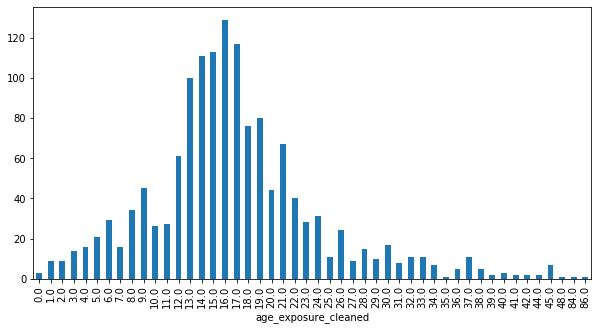

In [43]:
df.groupby('age_exposure_cleaned').size().plot(kind='bar', figsize=(10,5))

In [44]:
age_df = df[['age_exposure_cleaned']].sort_values('age_exposure_cleaned').reset_index().drop(columns=['index'])

In [45]:
v_counts = pd.DataFrame(age_df.age_exposure_cleaned.value_counts()).reset_index()

In [46]:
v_counts.columns

Index(['index', 'age_exposure_cleaned'], dtype='object')

In [47]:
v_counts = v_counts.rename(columns={'index':'age', 'age_exposure_cleaned':'count'})

In [48]:
v_counts.head(1)

,age,count
0,16.0,129


In [49]:
age_df = age_df.merge(v_counts, left_on='age_exposure_cleaned', right_on='age', how='left').drop(columns=['age'])

In [50]:
age_df.head(1)

,age_exposure_cleaned,count
0,0.0,3.0


In [51]:
age_df.loc[0, 'count']

3.0

In [52]:
age_df.loc[0, 'count']

3.0

Text(0.5, 1.0, 'Age of exposure')

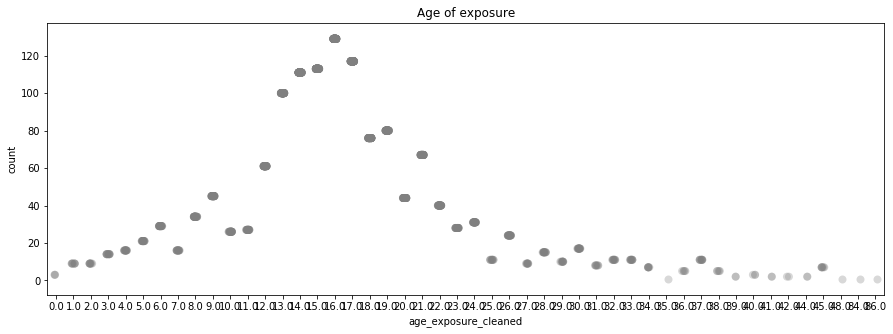

In [53]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.stripplot(x='age_exposure_cleaned', y='count', data=age_df, #jitter=True,
                   color='grey',
                  size=8, alpha=0.3)
ax.set_title('Age of exposure')

# plt.savefig("charts/age-scatter.pdf",  bbox_inches='tight')

# JUST BIOS

In [64]:
bios = pd.read_csv('data/survivors_bio_complete_cleaned.csv')
bios.shape

(1312, 19)

In [55]:
bios.columns

Index(['age_exposure_detail', 'code', 'details', 'work_location',
       'id_hiroshima', 'production_date', 'name_romaji', 'record_location',
       'exposure_pref', 'id_globalpeace', 'exposure_loc_filled',
       'status_then_filled', 'status_then_detail_filled', 'name_filled',
       'slug_filled', 'age_production_filled', 'exposure_dist_cleaned',
       'age_exposure_cleaned', 'is_female'],
      dtype='object')

In [56]:
bios.dtypes

age_exposure_detail          float64
code                          object
details                       object
work_location                 object
id_hiroshima                 float64
production_date               object
name_romaji                   object
record_location               object
exposure_pref                 object
id_globalpeace               float64
exposure_loc_filled           object
status_then_filled            object
status_then_detail_filled     object
name_filled                   object
slug_filled                   object
age_production_filled         object
exposure_dist_cleaned        float64
age_exposure_cleaned         float64
is_female                    float64
dtype: object

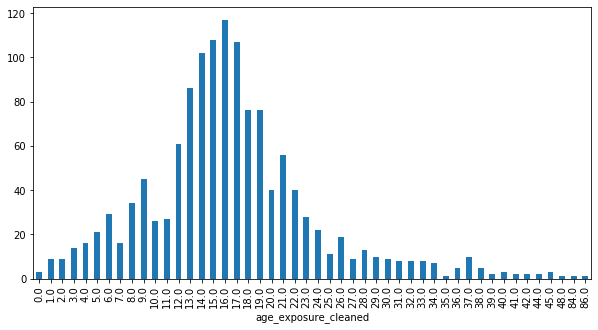

In [57]:
ax = bios.groupby('age_exposure_cleaned').size().plot(kind='bar', figsize=(10,5))

In [71]:
bios_select = bios[['details', 'age_exposure_cleaned', 'name_romaji','exposure_pref', 'exposure_loc_filled','slug_filled']]

bios_select[bios_select.age_exposure_cleaned == 35].sort_values('age_exposure_cleaned')

,details,age_exposure_cleaned,name_romaji,exposure_pref,exposure_loc_filled,slug_filled
775,NaN,35.0,egashira|chiyoko,長崎,三菱重工業㈱長崎兵器製作所 大橋工場(長崎市大橋町[現：長崎市文教町]),pic_syousai.php?gbID=107&dt=190805151404
